<a href="https://colab.research.google.com/github/agonist11/colabadmixtools/blob/main/G25_PCA_Plotter_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **G25 PCA Plotter V2**


---


Made by Florio for others to play around with.

In [ ]:
#@title **Install This First**
!pip install adjustText




---



Have your G25 Coords in a .txt file, each separated by an empty
row. Remove any unneccesary identifiers such as **_scaled**. For example: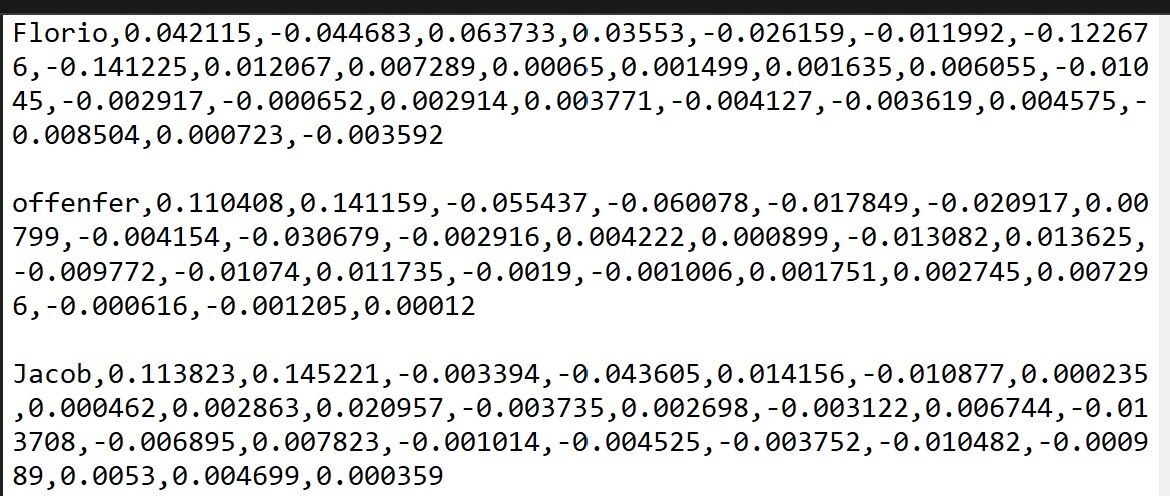

Upload it to the Colab session manually using the File Explorer on the left, or just drag and drop it into the folder. Copy and paste the filepath to the form below. Specifiy how many clusters you want to have from your dataset and the number of PCA components to analyze. For crowded PCAs, it helps to include subplots of those crowded regions. Feel free to change the title.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from adjustText import adjust_text
import numpy as np

# User-defined parameters
file_path = "/content/ServerCoords_V3.txt"  #@param {type:"string"}
num_clusters = 12  #@param {type:"integer"}
num_pca_components = 25  #@param {type:"integer"}

# Load the data into a Pandas DataFrame
data = pd.read_csv(file_path, header=None)

# Separate the labels and numerical data
labels = data.iloc[:, 0]  # First column contains the labels
numerical_data = data.iloc[:, 1:].astype(float)  # Rest are numerical values

# Perform PCA with user-defined components
pca = PCA(n_components=num_pca_components)
pca_result = pca.fit_transform(numerical_data)

# Perform clustering with KMeans using user-defined clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_result[:, :2])  # Clustering based on first two PCs

# Assign a color to each cluster
colors = plt.cm.tab10(clusters / max(clusters))

# Count the number of points in each cluster and get the 3 most dense
num_subplots = 3 #@param ""{type:"integer"}
cluster_counts = np.bincount(clusters)
top_3_clusters = np.argsort(cluster_counts)[-num_subplots:]  # Get indices of the top 3 largest clusters

# Compute bounding boxes for top 3 clusters
cluster_bounds = {}
for cluster_id in top_3_clusters:
    cluster_points = pca_result[clusters == cluster_id]
    x_min, x_max = cluster_points[:, 0].min(), cluster_points[:, 0].max()
    y_min, y_max = cluster_points[:, 1].min(), cluster_points[:, 1].max()

    # Add padding for better visibility
    x_range, y_range = x_max - x_min, y_max - y_min
    cluster_bounds[cluster_id] = (
        x_min - 0.1 * x_range, x_max + 0.1 * x_range,
        y_min - 0.1 * y_range, y_max + 0.1 * y_range
    )

# ----------------- FIRST FIGURE: FULL PCA PLOT -----------------
fig1, ax1 = plt.subplots(figsize=(22, 14), dpi=200)

texts = []
for i, label in enumerate(labels):
    x, y = pca_result[i, 0], pca_result[i, 1]
    ax1.scatter(x, y, c=[colors[i]], s=80, alpha=0.85, edgecolors="k")
    texts.append(ax1.text(x, y, label, fontsize=9, fontweight="bold", alpha=0.9))

# Adjust label positions
adjust_text(texts, ax=ax1, arrowprops=dict(arrowstyle="-", color='gray', lw=0.4),
            force_points=0.6, force_text=0.7, expand_points=(1.2, 1.4))

# Customize full PCA plot
full_pca_title = "Full PCA of Faces of our Past Server V3" #@param {type:"string"}
ax1.set_title(full_pca_title, fontsize=18, fontweight="bold", pad=10)
ax1.set_xlabel('Principal Component 1', fontsize=14, fontweight="bold", labelpad=10)
ax1.set_ylabel('Principal Component 2', fontsize=14, fontweight="bold", labelpad=10)

# Remove gridlines and thicken axis lines
ax1.grid(False)
for spine in ax1.spines.values():
    spine.set_linewidth(2)

# Improve layout
plt.tight_layout()
plt.show()

# ----------------- SECOND FIGURE: ZOOMED-IN CLUSTER PLOTS -----------------
fig2, axes = plt.subplots(1, num_subplots, figsize=(22, 8), dpi=200)

for ax, cluster_id in zip(axes, top_3_clusters):
    x_min, x_max, y_min, y_max = cluster_bounds[cluster_id]
    texts_zoom = []

    for i, label in enumerate(labels):
        x, y = pca_result[i, 0], pca_result[i, 1]
        if x_min <= x <= x_max and y_min <= y <= y_max:
            ax.scatter(x, y, c=[colors[i]], s=100, alpha=0.85, edgecolors="k")
            texts_zoom.append(ax.text(x, y, label, fontsize=9, fontweight="bold", alpha=0.9))

    # Adjust label positions
    adjust_text(texts_zoom, ax=ax, arrowprops=dict(arrowstyle="-", color='gray', lw=0.4),
                force_points=0.6, force_text=0.7, expand_points=(1.2, 1.4))

    # Customize subplot
    ax.set_title(f"Zoomed-In Cluster {cluster_id}", fontsize=10, fontweight="bold", pad=10)
    ax.set_xlabel('Principal Component 1', fontsize=14, fontweight="bold", labelpad=10)
    ax.set_ylabel('Principal Component 2', fontsize=14, fontweight="bold", labelpad=10)

    # Set limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Remove gridlines and thicken axis lines
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_linewidth(2)

# Improve layout and add a global title
plt.tight_layout()
plt.suptitle(f"Zoomed-In Views of Most Dense Clusters | Clusters: {num_clusters} | PCA Dimensions: {num_pca_components}",
             fontsize=10, fontweight="bold", y=1.02)
plt.show()
